We do SVD on movielens100k

In [1]:
from scipy import sparse

In [2]:
import numpy as np
from scipy import linalg

import sys
sys.path.append("..")
import create_data
import os
os.chdir("..")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = np.random.normal(0,1,size=(100,50))

In [11]:
U, s, Vh = linalg.svd(dat, full_matrices=False)
print U.shape, Vh.shape, s.shape
S = linalg.diagsvd(s, 50, 50)
np.allclose(dat, np.dot(U, np.dot(S, Vh)))

(100, 50) (50, 50) (50,)


True

---

In [19]:
tmp, _, _= create_data.load_movielens10m_matrix_new()

X_train =  (71567, 65133)
X_valid =  (71567, 65133)
X_test =  (71567, 65133)


In [36]:
len( tmp[71565,:].nonzero()[0] )

39

----

In [4]:
X_train, X_valid, X_test = create_data.load_movielens100k_matrix_new()

X_train =  (943, 1682)
X_valid =  (943, 1682)
X_test =  (943, 1682)


In [5]:
X_train_dense = X_train.astype("float32").todense()

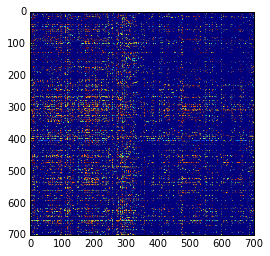

In [6]:
plt.imshow(X_train_dense[0:700,0:700])

In [19]:
np.mean(X_train_dense[0:10,], axis=1)

matrix([[ 0.00115149],
        [ 0.00076766],
        [ 0.00181935],
        [ 0.00184238],
        [ 0.00393042],
        [ 0.00196521],
        [ 0.00501282],
        [ 0.03278676],
        [ 0.00106705],
        [ 0.00594169]], dtype=float32)

In [20]:
np.nonzero(X_train_dense[0:10,])

(array([0, 0, 0, ..., 9, 9, 9]),
 array([ 291,  315,  355, ..., 2986, 3066, 3067]))

In [7]:
def center(X_frame):
    X_frame_dense = X_frame.astype("float32").todense()
    row_means = []
    for i in range(0, X_frame_dense.shape[0]):
        row = X_frame_dense[i]
        row_mean = np.sum(row) / ((row != 0).sum()+1)
        row = row - row_mean
        X_frame_dense[i] = row
        row_means.append([row_mean])
    row_means = np.asarray(row_means)
    return X_frame_dense, row_means

In [8]:
X_train_dense_centered, _ = center(X_train)

In [9]:
U, s, Vh = linalg.svd(X_train_dense_centered, full_matrices=False)

In [10]:
print U.shape, s.shape, Vh.shape
U = U.astype("float32")
s = s.astype("float32")
Vh = Vh.astype("float32")
S = linalg.diagsvd(s, len(s), len(s))

(943, 943) (943,) (943, 1682)


In [11]:
np.allclose( np.dot(np.dot(U, S), Vh), X_train_dense_centered, atol=1e-3 )

True

In [13]:
X_valid_dense_centered, _ = center(X_test)
X_valid_dense_centered = np.asarray(X_valid_dense_centered)
rmses = []
for k_reduced in [1,2,4,8,15,20,30,40,50,60,70,80,100,200,500,943]:
    U_reduced = U[:,0:k_reduced]
    S_reduced = linalg.diagsvd(s[0:k_reduced], k_reduced, k_reduced)
    Vh_reduced = Vh[0:k_reduced,:]
    print U_reduced.shape, S_reduced.shape, Vh_reduced.shape
    
    reconstruction = np.dot(np.dot(U_reduced, S_reduced), Vh_reduced)
    
    valid_mask = X_test.todense() != 0
    
    rmse = np.sqrt( np.sum( np.multiply( (X_valid_dense_centered-reconstruction)**2,valid_mask) ) / np.sum(valid_mask) )
    
    rmses.append(rmse)
    

(943, 1) (1, 1) (1, 1682)
(943, 2) (2, 2) (2, 1682)
(943, 4) (4, 4) (4, 1682)
(943, 8) (8, 8) (8, 1682)
(943, 15) (15, 15) (15, 1682)
(943, 20) (20, 20) (20, 1682)
(943, 30) (30, 30) (30, 1682)
(943, 40) (40, 40) (40, 1682)
(943, 50) (50, 50) (50, 1682)
(943, 60) (60, 60) (60, 1682)
(943, 70) (70, 70) (70, 1682)
(943, 80) (80, 80) (80, 1682)
(943, 100) (100, 100) (100, 1682)
(943, 200) (200, 200) (200, 1682)
(943, 500) (500, 500) (500, 1682)
(943, 943) (943, 943) (943, 1682)


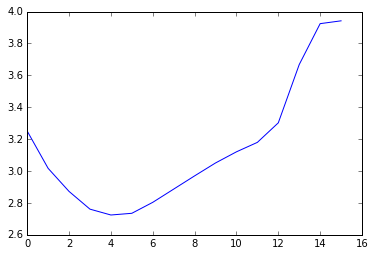

In [14]:
plt.plot(rmses)

---

In [6]:
tmp=np.where(X_train.todense() != 0)
arr1 =[]
for a,b in zip(tmp[0],tmp[1]):
    arr1.append((a,b))
arr1 = set(arr1)

In [7]:
tmp=np.where(X_valid.todense() != 0)
arr2 =[]
for a,b in zip(tmp[0],tmp[1]):
    arr2.append((a,b))
arr2 = set(arr2)

In [8]:
tmp=np.where(X_test.todense() != 0)
arr3 =[]
for a,b in zip(tmp[0],tmp[1]):
    arr3.append((a,b))
arr3 = set(arr3)

In [9]:
arr2.intersection(arr3)

set()

In [10]:
set([(10,20)]).intersection(set([(10,20)]))

{(10, 20)}